# Complete results (MNB and SVM)

In [1]:
import pandas as pd
import pprint as pp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [4]:
from inc import stop_words as sw
from inc import extra_stopwords as esw
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [5]:
from sqlalchemy import create_engine
table_name = 'Training_set_new'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [6]:
df = pd.read_sql_table(table_name, engine)

2020-12-20 14:39:22,796 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-20 14:39:22,797 INFO sqlalchemy.engine.base.Engine ()
2020-12-20 14:39:22,798 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-20 14:39:22,799 INFO sqlalchemy.engine.base.Engine ()
2020-12-20 14:39:22,801 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-20 14:39:22,801 INFO sqlalchemy.engine.base.Engine ()
2020-12-20 14:39:22,803 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-20 14:39:22,803 INFO sqlalchemy.engine.base.Engine ()
2020-12-20 14:39:22,805 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set_new")
2020-12-20 14:39:22,806 INFO sqlalchemy.engine.base.Engine ()
2020-12-20 14:39:22,809 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master

In [7]:
df = df.rename(columns={"class": "label"})

In [8]:
df.shape

(1534, 4)

In [9]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [10]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

# Results: Multinomial Naïve Bayes model

In [11]:
model = make_pipeline(TfidfVectorizer(stop_words=sw.STOP_WORDS), MultinomialNB())

In [12]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words={'aderton', 'adertonde', 'adjö',
                                             'aldrig', 'allas', 'allt',
                                             'alltid', 'alltså', 'andra',
                                             'andras', 'annan', 'annat',
                                             'ansökan', 'arton', 'artonde',
                                             'att', 'av', 'avhandling',
                                             'bakgrund', 'bakom', 'bara',
                                             'behöva', 'behövas', 'behövde',
                                             'behövt', 'beslut', 'beslutat',
                                             'beslutit', 'bland', 'blev', ...})),
                ('multinomialnb', MultinomialNB())])

In [13]:
labels = model.predict(test.abstract)

In [14]:
pp.pprint(labels)

array(['13', '15', '10', '17', '15', '17', '4', '7', '17', '11', '15',
       '17', '7', '7', '10', '9', '15', '3', '6', '17', '15', '10', '7',
       '17', '17', '17', '10', '3', '11', '11', '17', '10', '13', '17',
       '9', '17', '15', '7', '15', '7', '17', '4', '17', '11', '17', '7',
       '8', '17', '2', '10', '3', '4', '11', '7', '3', '3', '10', '3',
       '15', '2', '4', '15', '17', '3', '8', '12', '11', '17', '13', '7',
       '11', '11', '3', '17', '17', '8', '15', '10', '17', '7', '3', '9',
       '10', '10', '3', '10', '2', '10', '11', '15', '9', '11', '9', '17',
       '7', '17', '7', '13', '17', '6', '9', '17', '6', '17', '17', '13',
       '15', '3', '3', '17', '11', '11', '9', '3', '12', '9', '7', '14',
       '17', '8', '8', '11', '17', '17', '16', '17', '2', '17', '9', '15',
       '17', '7', '3', '10', '17', '17', '10', '7', '2', '17', '4', '10',
       '17', '11', '10', '2', '15', '15', '17', '3', '10', '12', '6', '9',
       '15', '17', '17', '15', '9', '17', '8'

In [15]:
test = test.drop(columns=['index'])

In [16]:
test = test.reset_index(drop=True)

In [17]:
test

,abstract,label,len
0,med testbednordic vara att testa biobasera o...,14,1190
1,en invasiv patog hymenoscyphus fraxineus riske...,15,1311
2,projekt vara att svara på fråga gälla likvär...,16,1319
3,vara att lycka marknadsvalidera och marknads...,3,1121
4,i europa binda årligen in kol i biomassa och m...,15,1342
...,...,...,...
302,för många människa vara alg och tång en kanske...,14,2899
303,den vara välkänd att vedrök vara hälsofarlig i...,3,1399
304,european college of veterinary public health e...,2,2019
305,coclimekommer att samarbeta och samproducera s...,13,1349


In [18]:
confusion_mx = {}
for ix, label in enumerate(labels):
    if label == test.label[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [19]:
conf_labels = list(map(str, list(range(2,18))))

In [20]:
print('test:', sorted(list(map(int, list(set(test.label))))))
print('pred:', sorted(list(map(int, list(set(labels))))))
print('conf:', conf_labels)

test: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
pred: [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
conf: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']


In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels, labels=conf_labels)

In [22]:
pp.pprint(mat)

array([[11,  5,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  3],
       [ 0,  5,  0,  0,  0,  1,  1,  0,  2,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  1,  5,  0,  0,  1,  1,  0,  5,  0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  1,  0,  0,  0,  8],
       [ 0,  1,  0,  0,  4,  1,  0,  2,  0,  0,  0,  2,  1,  2,  0,  2],
       [ 0,  0,  0,  0,  0,  8,  1,  0,  3,  2,  0,  0,  0,  0,  0,  1],
       [ 0,  2,  1,  0,  0,  2,  1,  3,  3,  0,  0,  0,  0,  0,  0,  9],
       [ 0,  1,  0,  0,  0,  4,  1,  3,  0,  3,  1,  0,  0,  0,  0,  9],
       [ 0,  3,  0,  0,  0,  2,  1,  0,  8,  1,  0,  0,  0,  0,  0,  6],
       [ 0,  2,  0,  0,  0,  1,  0,  2,  0, 12,  0,  0,  0,  0,  0,  2],
       [ 1,  3,  0,  0,  0,  3,  0,  2,  0,  0, 11,  1,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  2,  1,  0,  0,  2,  0,  3,  1,  5,  0,  6],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  1,  0,  2,  2,  3,  1,  1,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,

In [23]:
sorted_dict = dict(sorted(confusion_mx.items()))

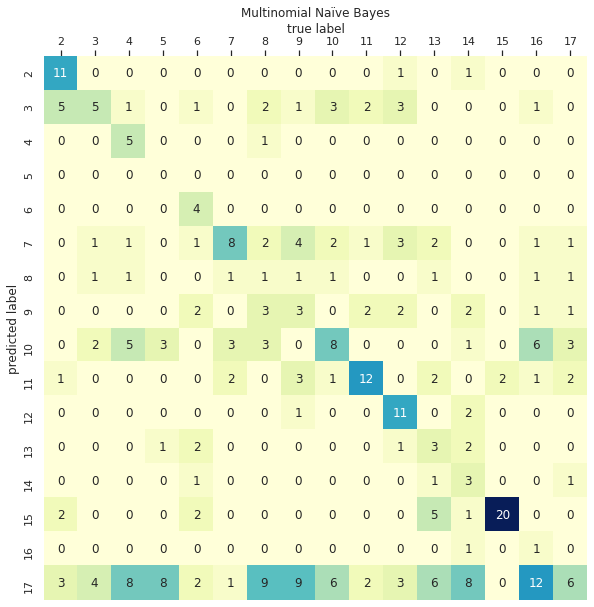

In [24]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.title('Multinomial Naïve Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label');

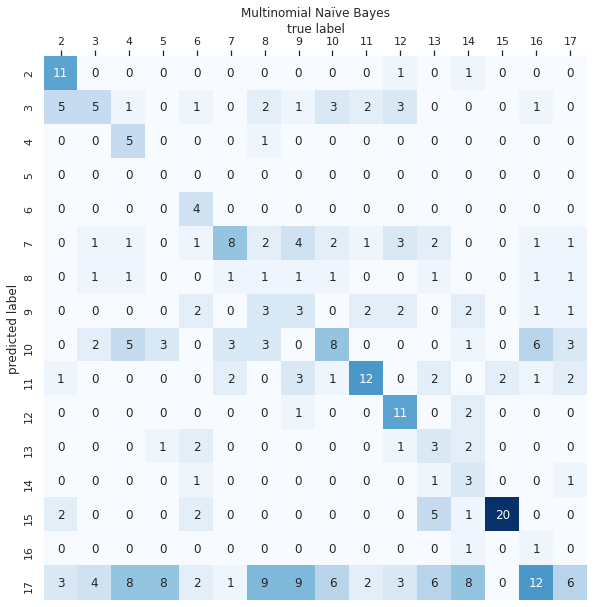

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.title('Multinomial Naïve Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
fig.savefig('img/heat_map_MultinomialNB.png')

In [27]:
from sklearn.metrics import classification_report

In [28]:
report = classification_report(test.label, labels, zero_division=0)

In [29]:
print("# Multinomial Naive Bayes results")
print(report)

# Multinomial Naive Bayes results
              precision    recall  f1-score   support

          10       0.24      0.38      0.29        21
          11       0.46      0.63      0.53        19
          12       0.79      0.46      0.58        24
          13       0.33      0.15      0.21        20
          14       0.50      0.14      0.22        21
          15       0.67      0.91      0.77        22
          16       0.50      0.04      0.08        24
          17       0.07      0.40      0.12        15
           2       0.85      0.50      0.63        22
           3       0.21      0.38      0.27        13
           4       0.83      0.24      0.37        21
           5       0.00      0.00      0.00        12
           6       1.00      0.27      0.42        15
           7       0.30      0.53      0.38        15
           8       0.11      0.05      0.07        21
           9       0.19      0.14      0.16        22

    accuracy                           0.33   

In [30]:
report_dict = classification_report(test.label, labels, zero_division=0, output_dict=True)

In [31]:
report_df = pd.DataFrame.from_records(report_dict)

In [32]:
report_T = report_df.T.sort_index(na_position={'2', '17'})

In [33]:
report_T.to_csv (r'db/report_MultinomialNB.csv', index = True, header=True)

# Results: Support Vector Machine model

In [34]:
train_data = train.abstract.tolist()
train_labels = train.label.tolist()

test_data = test.abstract.tolist()
test_labels = test.label.tolist()

In [35]:
from collections import Counter
print(Counter(train_labels))
print(Counter(test_labels))

Counter({'3': 87, '7': 85, '17': 85, '11': 81, '13': 80, '10': 79, '14': 79, '8': 79, '2': 78, '9': 78, '15': 78, '12': 76, '16': 76, '6': 72, '4': 67, '5': 47})
Counter({'16': 24, '12': 24, '15': 22, '9': 22, '2': 22, '14': 21, '8': 21, '4': 21, '10': 21, '13': 20, '11': 19, '7': 15, '6': 15, '17': 15, '3': 13, '5': 12})


In [36]:
tfidf_vectorizer = TfidfVectorizer(stop_words=sw.STOP_WORDS, max_features=None)

term_docs_train = tfidf_vectorizer.fit_transform(train_data)
term_docs_test = tfidf_vectorizer.transform(test_data)

In [37]:
from sklearn.svm import SVC

In [38]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(term_docs_train, train_labels)

SVC(kernel='linear', random_state=42)

In [39]:
accuracy = svm.score(term_docs_test, test_labels)
print('The accuracy of multiclass classification is: {0:.1f}%'.format(accuracy*100))

The accuracy of multiclass classification is: 38.1%


In [40]:
labels = svm.predict(term_docs_test)

In [41]:
confusion_mx = {}
for ix, label in enumerate(labels):
    if label == test_labels[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [42]:
conf_labels = list(map(str, list(range(2,18))))

In [43]:
mat = confusion_matrix(test_labels, labels, labels=conf_labels)

In [44]:
sorted_dict = dict(sorted(confusion_mx.items()))

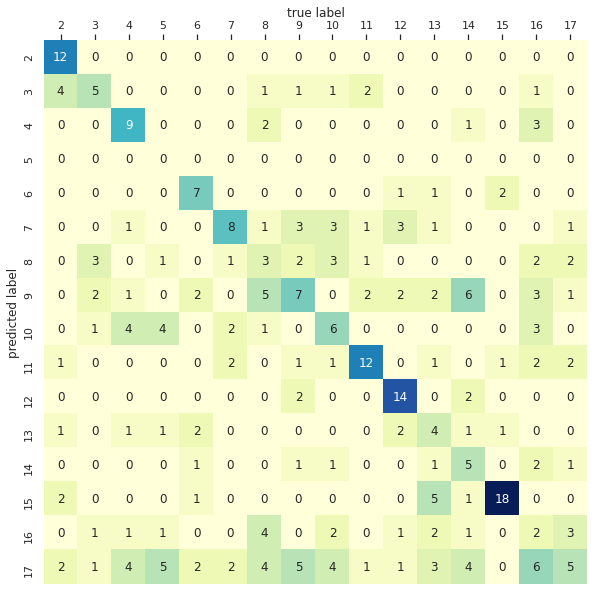

In [45]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

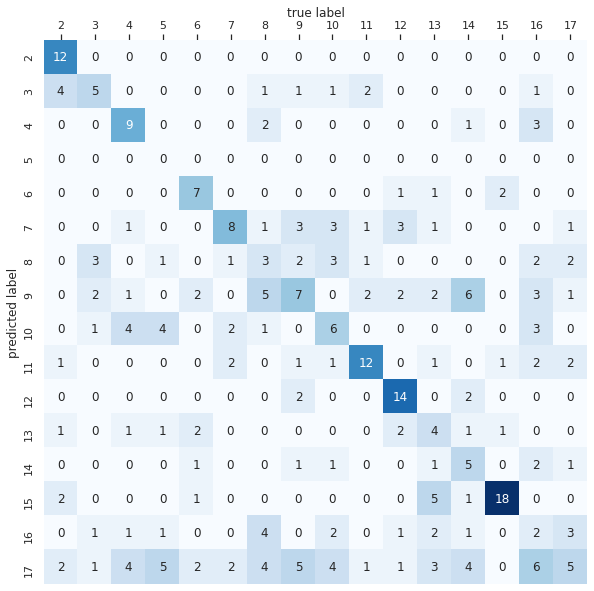

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
fig.savefig('img/heat_map_SVM.png')

In [48]:
report = classification_report(test_labels, labels)

/home/nesko/anaconda3/envs/gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print("# Suport Vector Machine (linear kernel) results")
print(report)

# Suport Vector Machine (linear kernel) results
              precision    recall  f1-score   support

          10       0.29      0.29      0.29        21
          11       0.52      0.63      0.57        19
          12       0.78      0.58      0.67        24
          13       0.31      0.20      0.24        20
          14       0.42      0.24      0.30        21
          15       0.67      0.82      0.73        22
          16       0.11      0.08      0.10        24
          17       0.10      0.33      0.16        15
           2       1.00      0.55      0.71        22
           3       0.33      0.38      0.36        13
           4       0.60      0.43      0.50        21
           5       0.00      0.00      0.00        12
           6       0.64      0.47      0.54        15
           7       0.36      0.53      0.43        15
           8       0.17      0.14      0.15        21
           9       0.21      0.32      0.25        22

    accuracy                    

In [50]:
report_dict = classification_report(test_labels, labels, zero_division=0, output_dict=True)
report_df = pd.DataFrame.from_records(report_dict)
report_T = report_df.T.sort_index(na_position={'2', '17'})
report_T.to_csv (r'db/report_SVM.csv', index = True, header=True)